In [4]:
import pandas as pd
data='./data/(Org)Mumbai_House_Price_Pred.csv'
df1 = pd.read_csv(data)
df1.dropna(inplace=True)
df1.drop(columns=['Price'],inplace=True)

In [5]:
df1.head()

,Bedroom,Bathroom,Area,Location,Age of property,Nearby amenities,Parking space,Property type
0,1,1,743,Powai,50,"Playground, Cafe",1,Apartment
1,5,2,2884,Malad,5,"Gym, Pool",1,Townhouse
2,3,1,4799,Borivali,40,"Gym, Pool",1,Penthouse
3,2,3,2107,Worli,45,"Hospital, Market",2,Penthouse
4,2,3,2731,Colaba,50,"Playground, Cafe",3,Villa


In [21]:
cols = []
print("House Features : ")
for col in df1.columns:
    print(col, end=', ')

cols = input("\n\nEnter the features you're looking in a house: ").split(',')
valid_cols = [col for col in cols if col in df1.columns]
if not valid_cols or len(cols) == 1:
    print("\nInvalid selection or Selected single feature")
    exit()
else :
    df2 = pd.read_csv(data, usecols=valid_cols + ['Price'])

    df2["Price"] = df2["Price"].replace(',', '', regex=True).astype(int)

    features = [col for col in df2.columns if col != 'Price']
    print("\nSelected features in a house: " + ", ".join(features))

House Features : 
Bedroom, Bathroom, Area, Location, Age of property, Nearby amenities, Parking space, Property type, 

Enter the features you're looking in a house: Area,Bedroom,Location,Age of property,Property type

Selected features in a house: Bedroom, Area, Location, Age of property, Property type


In [22]:
df2.describe()

,Bedroom,Area,Age of property,Price
count,400.000000,400.000000,400.000000,4.000000e+02
mean,3.517500,2765.395000,27.625000,3.358775e+07
std,1.690218,1240.210175,14.074965,1.418074e+07
min,1.000000,525.000000,5.000000,4.600000e+06
25%,2.000000,1667.250000,15.000000,2.115000e+07
50%,4.000000,2777.000000,30.000000,3.460000e+07
75%,5.000000,3875.500000,40.000000,5.000000e+07
max,6.000000,4984.000000,50.000000,5.000000e+07


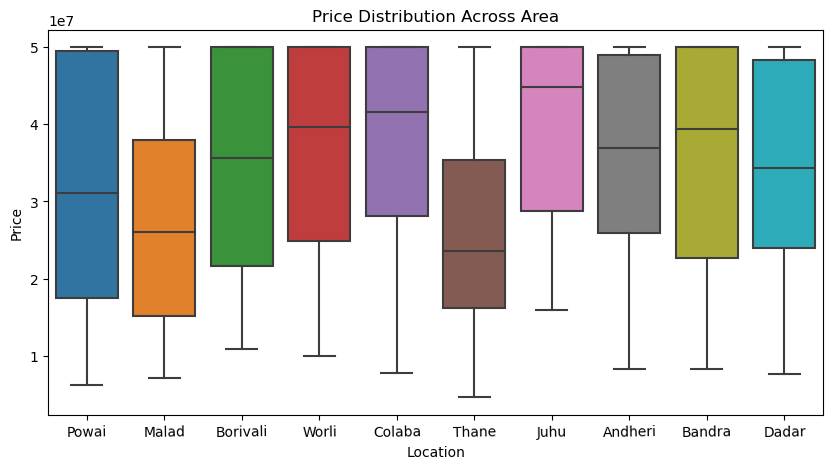

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=df1["Location"], y=df2["Price"])
plt.xticks(rotation=1)
plt.title("Price Distribution Across Area")
plt.show()

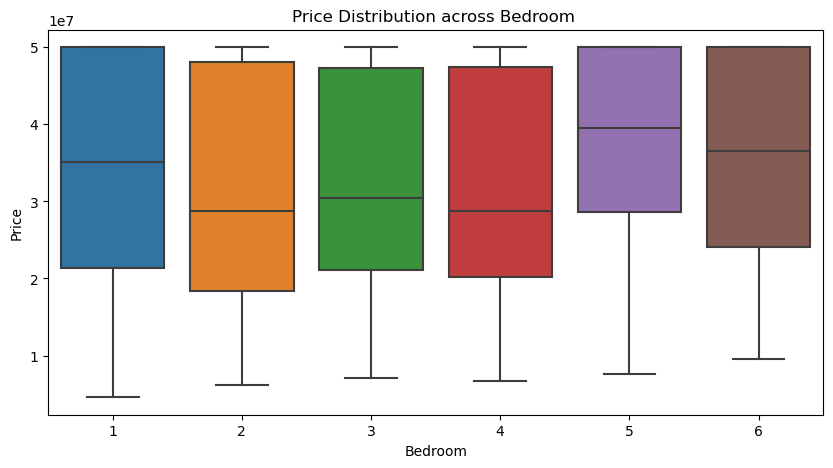

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1["Bedroom"], y=df2["Price"])
plt.title("Price Distribution across Bedroom ")
plt.show()

Text(0, 0.5, 'Count')

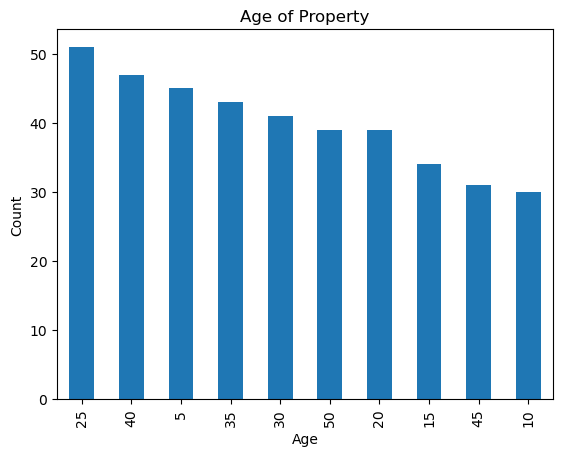

In [117]:
df1["Age of property"].value_counts().plot(kind='bar')
plt.title('Age of Property')
plt.xlabel('Age')
plt.ylabel('Count')


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('numbers', 'passthrough', [feature for feature in cols if df2[feature].dtype in ['int64', 'float64']]),
        ('Strings', OneHotEncoder(), [feature for feature in cols if df2[feature].dtype == 'object'])
    ])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=5))
])

X = df2[cols]
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numbers', 'passthrough',
                                                  ['Area', 'Bedroom',
                                                   'Age of property']),
                                                 ('Strings', OneHotEncoder(),
                                                  ['Location',
                                                   'Property type'])])),
                ('regressor', RandomForestRegressor(max_depth=5))])

In [24]:
user_input = {}
for feature in cols:
    user_input[feature] = input(f"{feature} : ").strip()  

user_df = pd.DataFrame([user_input])
y_pred = model.predict(user_df)

round_price = round(y_pred[0],-5)

print()
print(f"The predicted price for the house is: ₹ {round_price}")

Area : 3000
Bedroom : 3
Location : Thane
Age of property : 20
Property type : Penthouse

The predicted price for the house is: ₹ 31000000.0


In [29]:
from sklearn.metrics import r2_score

y_pred1=model.predict(X_test)

print("\nModel Performance:")
print(f"R^2 Score : {r2_score(y_test, y_pred1):.4f}")


Model Performance:
R^2 Score : 0.9473
